In [70]:
import pprint as p
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [71]:
class K_Means:
    
    def __init__(self, n_cluster=2, X=None) -> None:
        self.k = n_cluster
        self.X = X 
        self.labels_ = None
        self.centroids_ = None 
        self.itr = 0
    
    def calculate_distance(self, point1, point2):
        x1 = point1[0]
        y1 = point1[1]
        x2 = point2[0]
        y2 = point2[1]
        
        return np.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    def calculate_median(self, clusters):
         
        # variables
        data_points = [[] for i in range(self.k)]
        
        # separate each cluster
        for i in range(len(clusters)):
            id = clusters[i]
            data_points[id].append(self.X[i])
            
        # find the median of each cluster
        return [np.median(cluster, axis=0) for cluster in data_points]
                
    def predict(self, data):
        
        result = []
        
        for point in data:
            distance = []
            
            for centroid in self.centroids_:
                distance.append(self.calculate_distance(point, centroid))
                
            result.append(distance.index(min(distance)))
            
        result = list(result)
        return result
            
    def fit(self):
        
        # clusters
        clusters = []
        
        # randomly select k points as the initial centroids
        centroids = [i for i in range(self.k)]
        centroids = self.X[np.random.choice(self.X.shape[0], self.k, replace=False)]
        # centroids = np.array([np.max(self.X, axis=0), np.min(self.X, axis=0), np.median(self.X, axis=0)])
        
        print("Random centroids: \n", centroids)
        
        while 1:
                            
            # calculate the distance between each point and the centroids
            for point in self.X:
                distance = []
                
                for centroid in centroids:
                    distance.append(self.calculate_distance(point, centroid))
                    
                clusters.append(distance.index(min(distance)))
                
            # calculate the median of each cluster
            new_centroids = self.calculate_median(clusters)
            
            # check for next iteration
            if np.array_equal(centroids, new_centroids):
                self.labels_ = clusters
                self.centroids_ = centroids
                return 
            
            else: 
                centroids = new_centroids
                clusters = []
                self.itr += 1
                
     

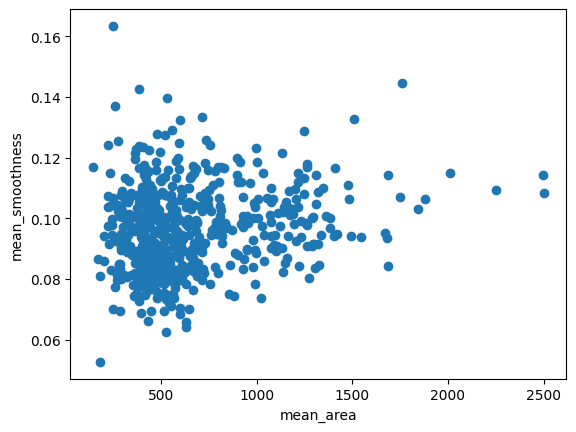

Random centroids: 
 [[4.327e+02 8.372e-02]
 [3.727e+02 1.006e-01]
 [7.735e+02 1.109e-01]]
Final Centroids:
[array([6.107e+02, 9.423e-02]),
 array([3.998e+02, 9.514e-02]),
 array([1.167e+03, 1.003e-01])]
Iteration:  11


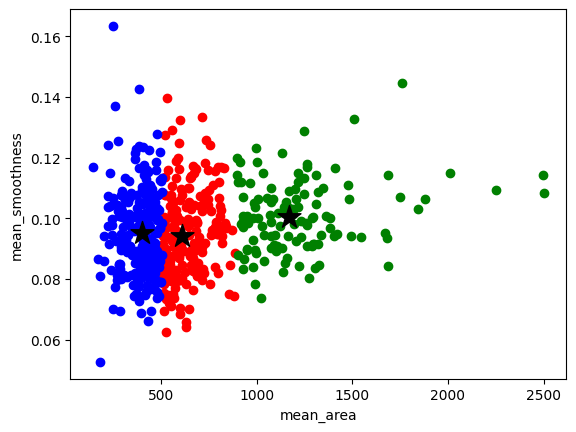

In [72]:
# read data from csv file
data = pd.read_csv('data3.csv')
df = data.iloc[:, :]
df = np.array(df)

# define variable
var1 = 'mean_area'
var2 = 'mean_smoothness'
k = 3

# plot the data (before clustering)
plt.scatter(data[var1], data[var2])
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

# apply the K-Means algorithm
kmeans = K_Means(n_cluster=k, X=df)
kmeans.fit()
print("Final Centroids:")
p.pprint(kmeans.centroids_)
print("Iteration: ", kmeans.itr)

# plot the data (after clustering)
data['cluster'] = kmeans.labels_
color = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'purple', 'pink', 'gray', 'brown']

for i in range(k):
    df = data[data.cluster == i]
    plt.scatter(df[var1], df[var2], color=color[i])
    plt.scatter(kmeans.centroids_[i][0], kmeans.centroids_[i][1], marker='*', s=300, c='black')

plt.xlabel(var1)
plt.ylabel(var2)
plt.show()
